In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from multiplicity_helper import *
from plot_figures_integrated import *

In [ ]:
df = pd.DataFrame(np.random.randint(0,6,size=(100, 4)), columns=['race','x','y','yh'])

In [3]:
import sys
sys.path.append('baseline-methods')
from hsls_utils import *
path = './data/'
file = 'HSLS/hsls_knn_impute.pkl'
df = load_hsls_imputed(path, file, [])
privileged_groups = [{'racebin': 1}]
unprivileged_groups = [{'racebin': 0}]
protected_attr = ['racebin']
label_name = 'gradebin'

In [4]:
original, hardt, reduction, rejection, leverage, mp, tolerance = load_hsls_plots("rf", "eo", "33")

In [5]:
score_original, score_hardt, score_reduction, score_rejection, score_leverage, score_mp = process_scores_per_itr("hsls", "rf", fair='eo', start_seed = 33, end_seed = 42)

In [6]:
np.array(score_reduction).shape

(10, 80, 2177, 1)

In [7]:
np.array(score_original).shape

(10, 10, 2177, 1)

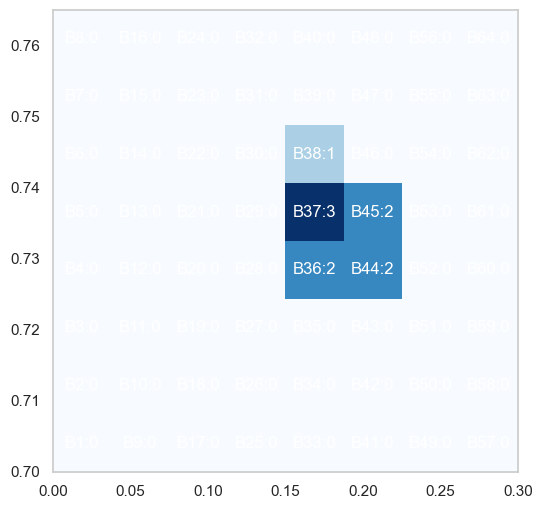

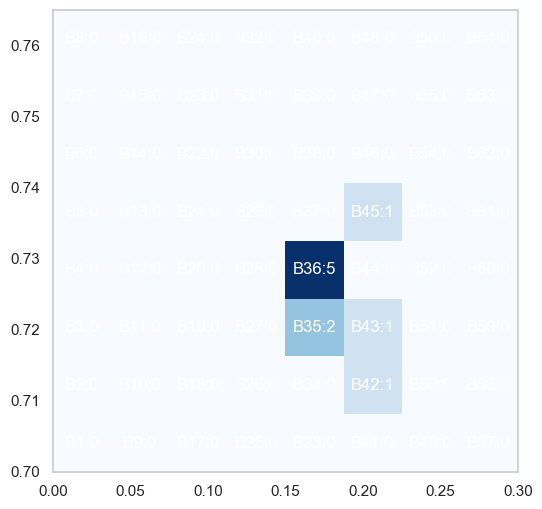

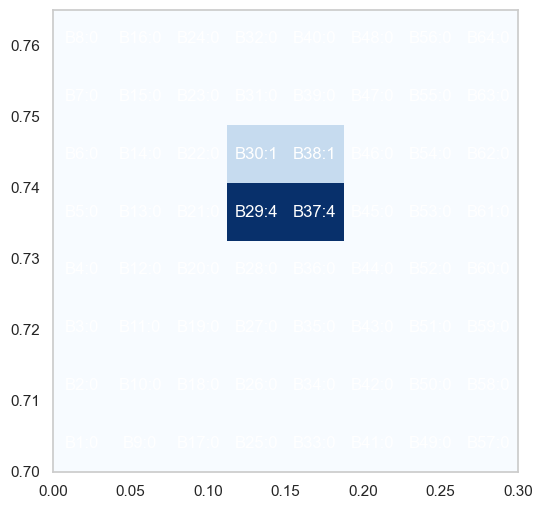

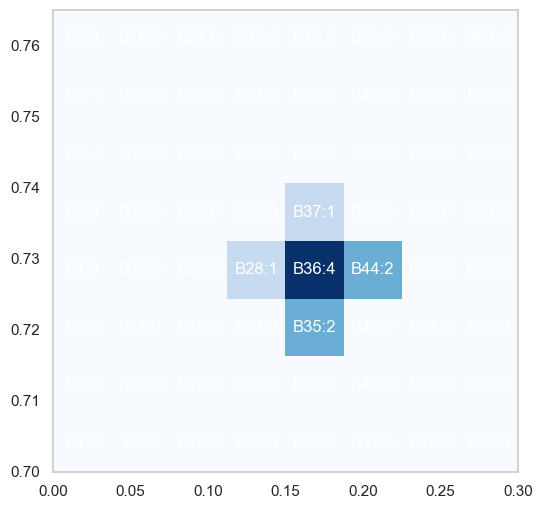

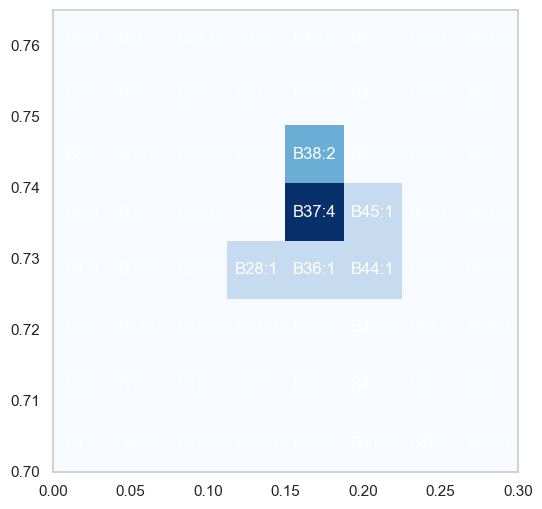

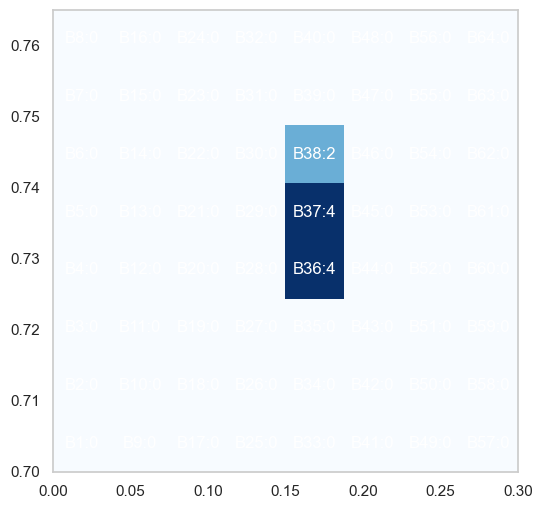

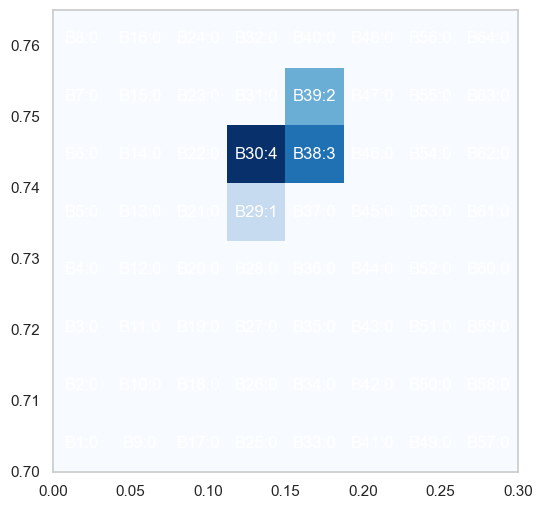

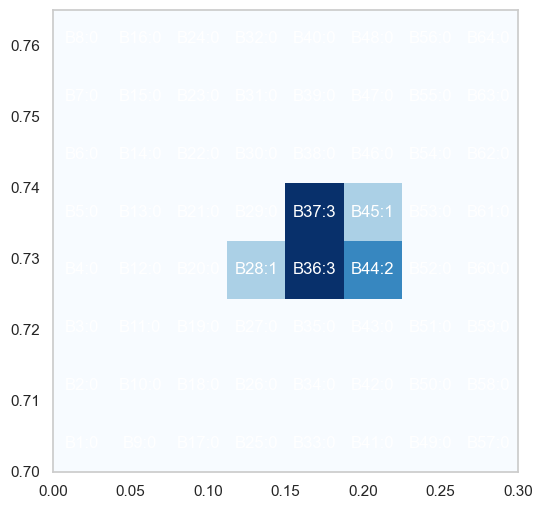

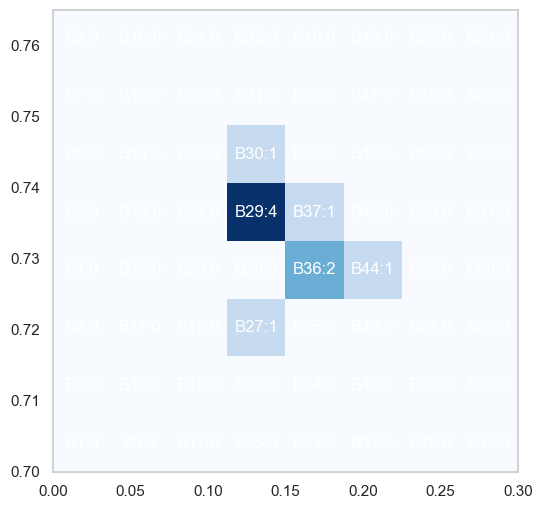

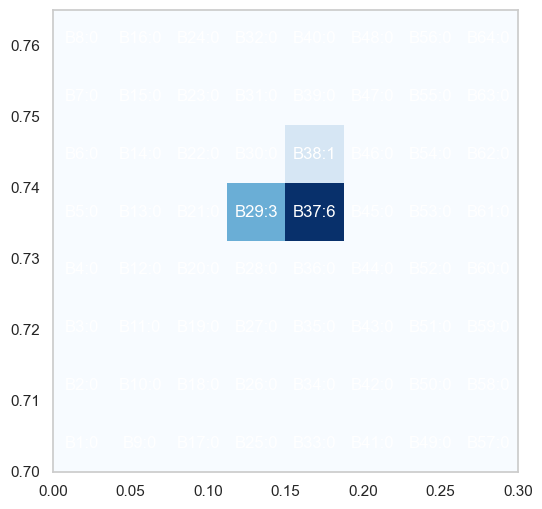

In [18]:

H_combine = np.zeros((8,8))
x_list_combine = []
y_list_combine = []
for i in range(10):
    meo_list, acc_list = get_eo_acc("hsls", score_original[i],i)

    # Define the x and y data
    x_list = meo_list
    y_list = acc_list
    for list in x_list:
        x_list_combine.append(list)
    for list in y_list:
        y_list_combine.append(list)

    # Define the number of bins in each dimension
    num_bins = 8

    # Define the range of values in each dimension
    # x_range = (min(x_list), max(x_list))
    # y_range = (min(y_list), max(y_list))
    x_range = (0, 0.3)
    y_range = (0.70, 0.765)
    # Calculate the bin edges in each dimension
    x_bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
    y_bins = np.linspace(y_range[0], y_range[1], num_bins + 1)

    # Bin the x and y values
    x_bin_indices = np.digitize(x_list, x_bins)
    y_bin_indices = np.digitize(y_list, y_bins)

    # Calculate the bin labels for each point
    bin_labels = (x_bin_indices - 1) * num_bins + y_bin_indices

    # Print the bin labels for each point
    # for i in range(len(x_list)):
    #     print("Point ({:.2f}, {:.2f}) is in bin {}".format(x_list[i], y_list[i], bin_labels[i]))

    # Create a 2D histogram plot and label each bin
    fig, ax = plt.subplots(figsize = (6,6))
    H, xedges, yedges = np.histogram2d(x_list, y_list, bins=(x_bins, y_bins))
    H_combine += H
    for i in range(num_bins):
        for j in range(num_bins):
            bin_label = (i) * num_bins + j + 1
            x_center = (x_bins[i] + x_bins[i+1]) / 2
            y_center = (y_bins[j] + y_bins[j+1]) / 2
            ax.text(x_center, y_center, "B{}:{}".format(int(bin_label), int(H[i][j])), color='w', ha='center', va='center')

    # Plot the 2D histogram
    plt.hist2d(x_list, y_list, bins=(x_bins, y_bins), cmap=plt.cm.Blues)

100.0


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  3., 12.,  6.,  0.,  0.],
        [ 0.,  0.,  4., 21., 26., 10.,  2.,  0.],
        [ 0.,  1.,  1.,  8.,  5.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.    , 0.0375, 0.075 , 0.1125, 0.15  , 0.1875, 0.225 , 0.2625,
        0.3   ]),
 array([0.7     , 0.708125, 0.71625 , 0.724375, 0.7325  , 0.740625,
        0.74875 , 0.756875, 0.765   ]),
 <matplotlib.collections.QuadMesh at 0x2a2eb6ad0>)

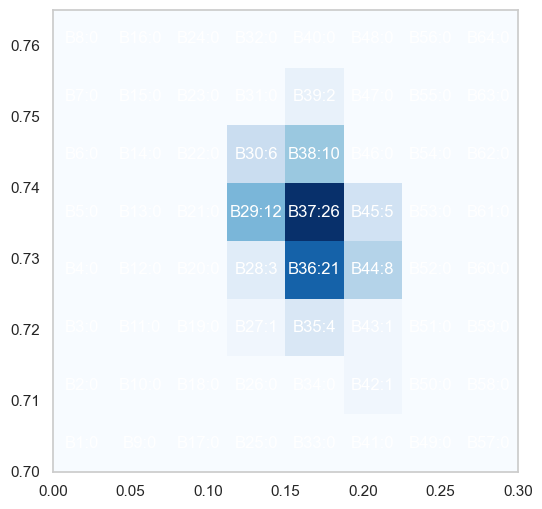

In [19]:
print(H_combine.sum())
# Create a 2D histogram plot and label each bin
fig, ax = plt.subplots(figsize = (6,6))
H, xedges, yedges = np.histogram2d(x_list_combine, y_list_combine, bins=(x_bins, y_bins))
for i in range(num_bins):
    for j in range(num_bins):
        bin_label = (i) * num_bins + j + 1
        x_center = (x_bins[i] + x_bins[i+1]) / 2
        y_center = (y_bins[j] + y_bins[j+1]) / 2
        ax.text(x_center, y_center, "B{}:{}".format(int(bin_label), int(H_combine[i][j])), color='w', ha='center', va='center')

# Plot the 2D histogram
plt.hist2d(x_list_combine, y_list_combine, bins=(x_bins, y_bins), cmap=plt.cm.Blues)


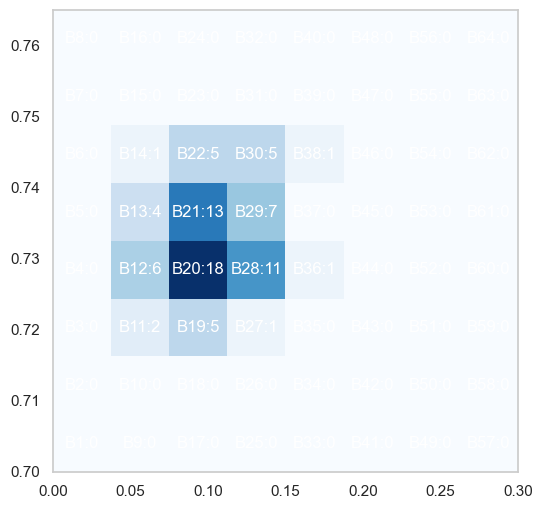

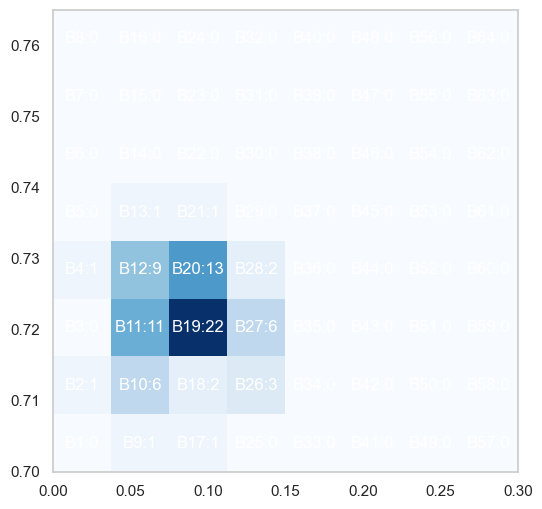

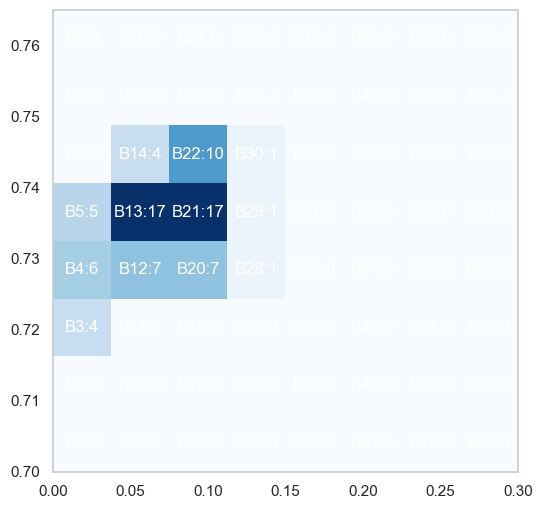

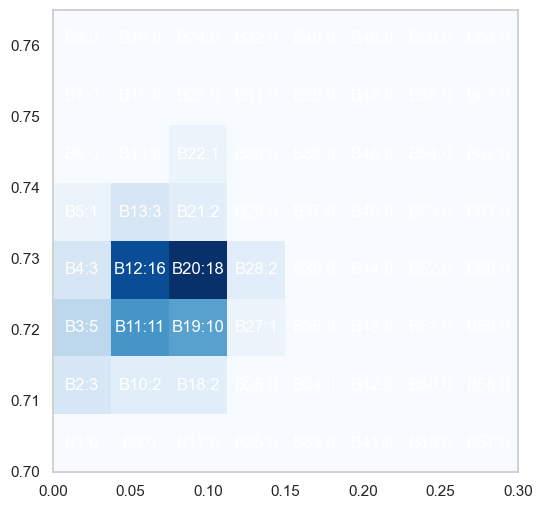

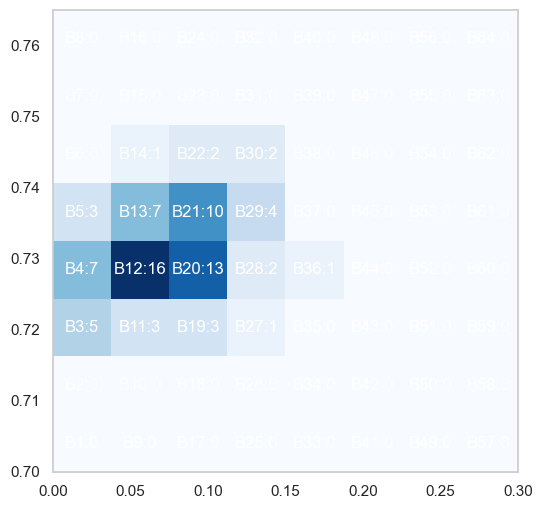

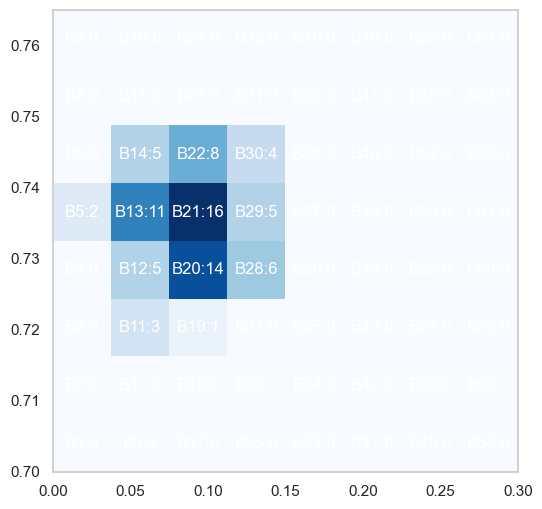

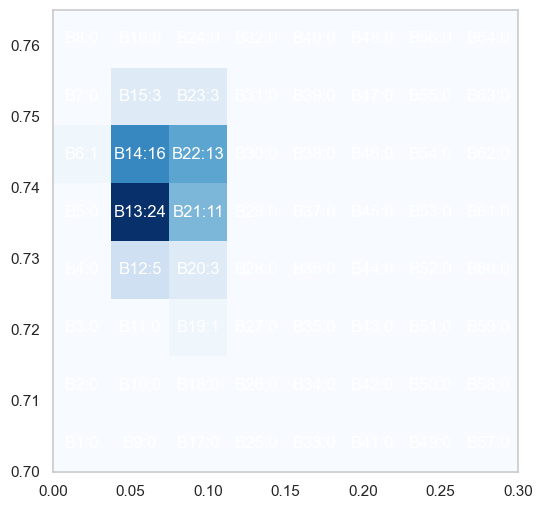

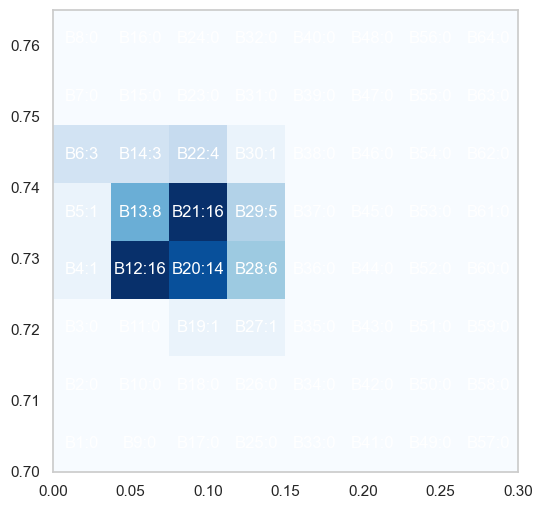

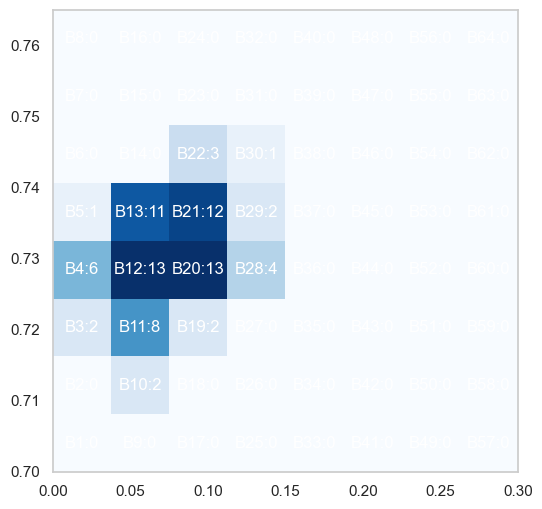

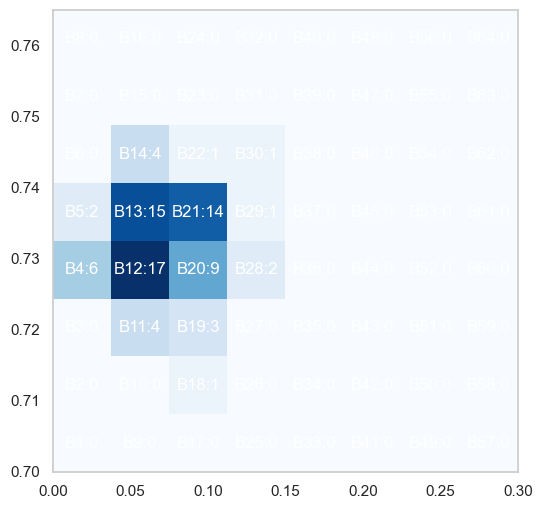

In [16]:
# fair_bin: 6; unfair_bin:39
bin_6_ct = []
bin_39_ct = []
H_combine = np.zeros((8,8))
x_list_combine = []
y_list_combine = []
for i in range(10):
    meo_list, acc_list = get_eo_acc("hsls", score_reduction[i],i)

    # Define the x and y data
    x_list = meo_list
    y_list = acc_list
    for list in x_list:
        x_list_combine.append(list)
    for list in y_list:
        y_list_combine.append(list)

    # Define the number of bins in each dimension
    num_bins = 8

    # Define the range of values in each dimension
    # x_range = (min(x_list), max(x_list))
    # y_range = (min(y_list), max(y_list))
    x_range = (0, 0.3)
    y_range = (0.70, 0.765)
    # Calculate the bin edges in each dimension
    x_bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
    y_bins = np.linspace(y_range[0], y_range[1], num_bins + 1)

    # Bin the x and y values
    x_bin_indices = np.digitize(x_list, x_bins)
    y_bin_indices = np.digitize(y_list, y_bins)

    # Calculate the bin labels for each point
    bin_labels = (x_bin_indices - 1) * num_bins + y_bin_indices

    # Print the bin labels for each point
    # for i in range(len(x_list)):
    #     print("Point ({:.2f}, {:.2f}) is in bin {}".format(x_list[i], y_list[i], bin_labels[i]))

    # Create a 2D histogram plot and label each bin
    fig, ax = plt.subplots(figsize = (6,6))
    H, xedges, yedges = np.histogram2d(x_list, y_list, bins=(x_bins, y_bins))
    H_combine += H
    for i in range(num_bins):
        for j in range(num_bins):
            bin_label = (i) * num_bins + j + 1
            x_center = (x_bins[i] + x_bins[i+1]) / 2
            y_center = (y_bins[j] + y_bins[j+1]) / 2
            ax.text(x_center, y_center, "B{}:{}".format(int(bin_label), int(H[i][j])), color='w', ha='center', va='center')

    # Plot the 2D histogram
    plt.hist2d(x_list, y_list, bins=(x_bins, y_bins), cmap=plt.cm.Blues)

In [47]:
H_combine.sum()

800.0

(array([[  0.,   0.,   0.,  22., 105.,  31.,   0.,   0.],
        [  0.,   0.,   0.,  10., 102.,  57.,   2.,   0.],
        [  0.,   0.,   0.,   2.,  59., 101.,   9.,   0.],
        [  0.,   0.,   0.,   0.,  11.,  86.,  25.,   0.],
        [  0.,   0.,   0.,   0.,  19.,  96.,  43.,   0.],
        [  0.,   0.,   0.,   0.,   1.,  13.,   5.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.    , 0.0375, 0.075 , 0.1125, 0.15  , 0.1875, 0.225 , 0.2625,
        0.3   ]),
 array([0.615   , 0.623125, 0.63125 , 0.639375, 0.6475  , 0.655625,
        0.66375 , 0.671875, 0.68    ]),
 <matplotlib.collections.QuadMesh at 0x2a550b670>)

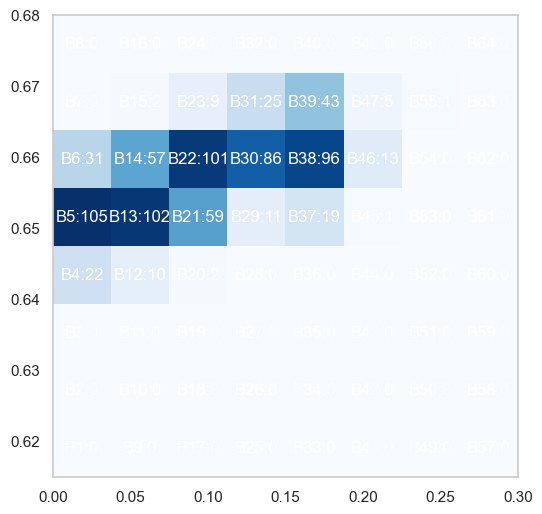

In [48]:
# Create a 2D histogram plot and label each bin
fig, ax = plt.subplots(figsize = (6,6))
H, xedges, yedges = np.histogram2d(x_list_combine, y_list_combine, bins=(x_bins, y_bins))
for i in range(num_bins):
    for j in range(num_bins):
        bin_label = (i) * num_bins + j + 1
        x_center = (x_bins[i] + x_bins[i+1]) / 2
        y_center = (y_bins[j] + y_bins[j+1]) / 2
        ax.text(x_center, y_center, "B{}:{}".format(int(bin_label), int(H_combine[i][j])), color='w', ha='center', va='center')

# Plot the 2D histogram
plt.hist2d(x_list_combine, y_list_combine, bins=(x_bins, y_bins), cmap=plt.cm.Blues)


In [ ]:
# compute score_std for a given bin
bin_label = 6
score_list = bin_scores_dic[bin_label]
score_list_reshaped = np.squeeze(score_list)
# xlen = np.array(bin_scores_dic[bin_label]).shape[0]
# ylen = np.array(bin_scores_dic[bin_label]).shape[1]
# score_list_reshaped = np.reshape(score_list, (xlen, ylen))
score_sd_per_sample = pd.DataFrame(score_list_reshaped).std()

In [ ]:
# get pred_table

itr_number = 0
data = "enem"
path = './data/'
if data == "enem":
    df = pd.read_pickle(path+'ENEM/enem-50000-20.pkl')
    label_name = 'gradebin'
    #protected_attrs = ['racebin', 'sexbin']
    protected_attrs = ['racebin']
    label_name = 'gradebin'
    df[label_name] = df[label_name].astype(int)    

dataset_orig_train, dataset_orig_vt = train_test_split(df, test_size=0.3, random_state=itr_number)    
dataset_orig_valid, dataset_orig_test = train_test_split(dataset_orig_vt, test_size=0.5, random_state=itr_number)    

X_test = dataset_orig_test
Y_test = dataset_orig_test[label_name]
# test dataset with group attributes and multiplicity 
pred_table = pd.DataFrame(data=X_test, copy=True)
pred_table = pred_table[protected_attrs]

# insert score_std into pred_table
pred_table["group score std"] = np.array(score_sd_per_sample)

In [ ]:
pred_table.groupby(['sexbin']).quantile(.75)

In [ ]:
print(np.array(v_plot_list).shape)
print(np.mean(v_plot_list,axis = 0).shape)
print(np.std(v_plot_list, axis = 0, ddof=1).shape)

In [ ]:
# fair_bin: 5+6; unfair_bin:39+40
fair_bins = [5,6]
unfair_bins = [39,40]
original, hardt, reduction, rejection, leverage, mp, tolerance = load_enem_plots("rf", "eo", "33")
score_original, score_hardt, score_reduction, score_rejection, score_leverage, score_mp = process_scores_per_itr("enem", "rf", fair='eo', start_seed = 33, end_seed = 42)

# Define the number of bins in each dimension
num_bins = 8

# Define the range of values in each dimension
x_range = (0, 0.3)
y_range = (0.615, 0.67)
# Calculate the bin edges in each dimension
x_bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
y_bins = np.linspace(y_range[0], y_range[1], num_bins + 1)

# plot score_std quantile for bin 6(fair) and bin 39(unfair), use 10 data splits to get error bar
v_plot_list = []
for i in range(10):
    meo_list, acc_list = get_eo_acc("enem", score_reduction[i],i)

    # Define the x and y data
    x_list = meo_list
    y_list = acc_list

    # Bin the x and y values
    x_bin_indices = np.digitize(x_list, x_bins)
    y_bin_indices = np.digitize(y_list, y_bins)

    # Calculate the bin labels for each point
    bin_labels = (x_bin_indices - 1) * num_bins + y_bin_indices
    bin_scores_dic = {label: [elem for elem, label_elem in zip(score_reduction[0], bin_labels) if label_elem == label] for label in set(bin_labels)}
    
    # fair bins
    score_list_fair = []
    for bin in fair_bins:
        score_list_fair.append(np.squeeze(bin_scores_dic[bin]))
    score_list_reshaped = np.squeeze(score_list)
    score_sd_per_sample = pd.DataFrame(score_list_reshaped).std()


In [ ]:
bin_6_ct

In [50]:
data = "enem"
path = './data/'
if data == "enem":
    df = pd.read_pickle(path+'ENEM/enem-50000-20.pkl')
    label_name = 'gradebin'
    #protected_attrs = ['racebin', 'sexbin']
    protected_attrs = ['racebin']
    label_name = 'gradebin'
    df[label_name] = df[label_name].astype(int)    

In [51]:
score_original, score_hardt, score_reduction, score_rejection, score_leverage, score_mp = process_scores("enem", "rf", "eo",33, 42)

In [52]:
score_reduction

{0.1: [[array([[1.        ],
          [0.        ],
          [1.        ],
          ...,
          [0.        ],
          [0.15673246],
          [1.        ]]),
   array([[1.        ],
          [0.        ],
          [1.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.20804997]]),
   array([[0.95632076],
          [0.        ],
          [1.        ],
          ...,
          [0.        ],
          [1.        ],
          [1.        ]]),
   array([[0.97830545],
          [0.        ],
          [1.        ],
          ...,
          [0.        ],
          [0.79710615],
          [0.8188007 ]]),
   array([[1.        ],
          [0.        ],
          [1.        ],
          ...,
          [0.        ],
          [0.09995194],
          [1.        ]]),
   array([[1.       ],
          [0.       ],
          [1.       ],
          ...,
          [0.       ],
          [0.0863926],
          [1.       ]]),
   array([[0.8565486],
          [0

In [68]:
score_list = score_reduction[0.1][0]
#score_list = score_original[2]
itr_number = 0
label_name = 'gradebin'
#protected_attrs = ['racebin']
protected_attrs = ['racebin','sexbin']
label_name = 'gradebin'
df[label_name] = df[label_name].astype(int)    

dataset_orig_train, dataset_orig_vt = train_test_split(df, test_size=0.3, random_state=itr_number)    
dataset_orig_valid, dataset_orig_test = train_test_split(dataset_orig_vt, test_size=0.5, random_state=itr_number)    

X_test = dataset_orig_test
Y_test = dataset_orig_test[label_name]
# test dataset with group attributes and multiplicity 
pred_table = pd.DataFrame(data=X_test, copy=True)
pred_table = pred_table[protected_attrs]

# compute score_std
xlen = np.array(score_list).shape[0]
ylen = np.array(score_list).shape[1]
score_list_1 = np.reshape(score_list, (xlen, ylen))
score_sd_per_sample = pd.DataFrame(score_list_1).std()
pred_table["group score std"] = np.array(score_sd_per_sample)

In [69]:
pred_table.groupby(['racebin']).quantile(.67)

,sexbin,group score std
racebin,,
0,1.0,0.249436
1,1.0,0.191777


In [70]:
#pred_table.groupby(['racebin','sexbin']).quantile(.8)
pred_table.groupby(['racebin']).quantile(.75)

,sexbin,group score std
racebin,,
0,1.0,0.300686
1,1.0,0.276669


In [71]:
pred_table.groupby(['racebin','sexbin']).mean()

group score std
racebin sexbin                 
0       0.0            0.115626
        1.0            0.163317
1       0.0            0.115081
        1.0            0.137790

In [72]:
abs(pred_table.groupby(['racebin','sexbin']).quantile(.8).loc[:,"group score std"].max())

0.36952406087165446

In [73]:
#pred_table.groupby(['sexbin']).mean()

IndexError: index 2 is out of bounds for axis 0 with size 2

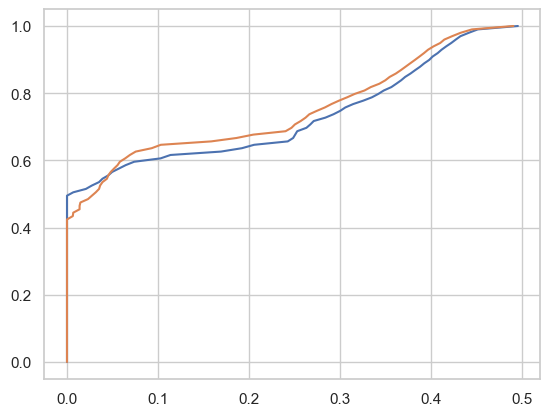

In [74]:
import matplotlib.pyplot as plt

t = np.linspace(0,1,100)
v = [pred_table.groupby(['racebin']).quantile(t_ix)['group score std'].to_numpy() for t_ix in t]
for i in range(4):
    v_plot = []
    for a in v:
        v_plot.append(a[i])
        
    plt.plot(v_plot,t)
    
plt.xlabel('score std')
plt.ylabel('cumulative dist')

In [67]:
score_reduction.keys()

dict_keys([0.1, 1, 4, 6, 8, 9, 10, 12])